#### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

#### importing required librarries

In [ ]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Eve\loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


#### EDA

In [6]:
#Checking the shape of the dataset
df.shape

(614, 13)

-In the dataset 614 rows and 13 columns.including the target columns.

-Loan_status is our target/label column

In [8]:
# checking columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
# checking data type
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

8 column Object,4 column float and 1 column int.

In [10]:
# checking the missing value of the dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are many missing column in our dataset

In [11]:
# checking information of our datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Analyzing the target column:

In [12]:
# checking target column count
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

422 People Loan Approved and 192 People loan not Approved

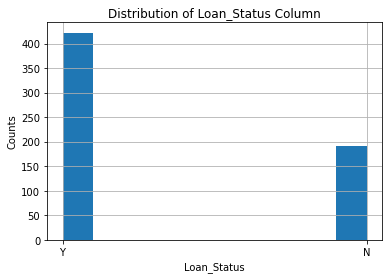

In [13]:
# Plotting histogram to show the distribution of data in the target coulmn.

df['Loan_Status'].hist(grid=True)
plt.ylabel('Counts')
plt.xlabel('Loan_Status')
plt.title('Distribution of Loan_Status Column')
plt.show()

The above dig show the target column is inbalance

In [14]:
# Working on missing value
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

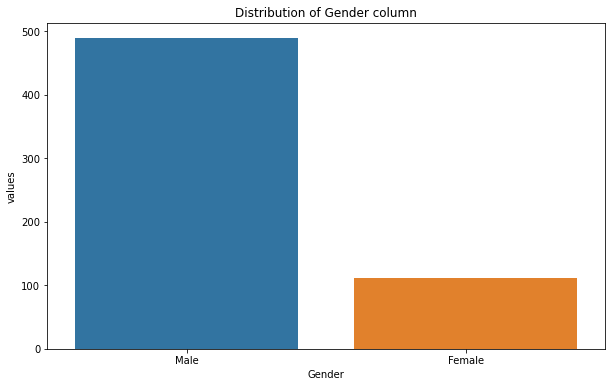

In [15]:
# plotting the graph to show the value counts of gender in column

plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender')
plt.ylabel('values')
plt.title('Distribution of Gender column')
plt.show()


in the dataset the number of males are more.so we replacing value with male.

In [16]:
# Replacing the missing value
df['Gender'].fillna('Male',inplace=True)

In [17]:
# checking value counts of married
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

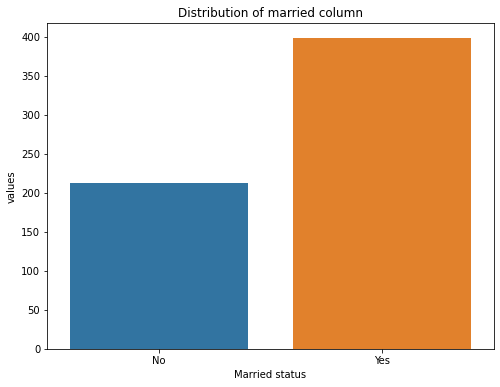

In [18]:
# plotting graph to show value of counts in married columns
plt.figure(figsize=(8,6))
sns.countplot(x='Married',data=df)
plt.xlabel('Married status')
plt.ylabel('values')
plt.title('Distribution of married column')
plt.show()

In the dataset number of married persons are more. So, we will replace the missing values with 'Yes'.

In [19]:
# replacing missing values
df['Married'].fillna('yes',inplace=True)

In [20]:
# checking value counts of Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

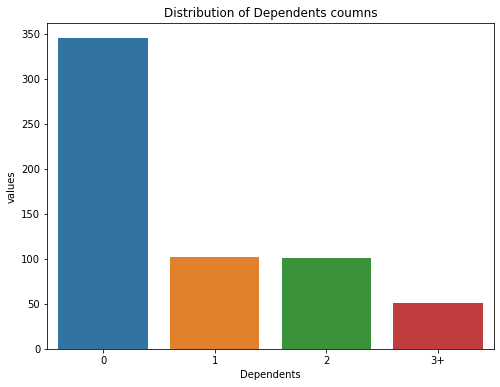

In [21]:
# plotting graph to show counts of Dependents columns
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents',data=df)
plt.xlabel('Dependents')
plt.ylabel('values')
plt.title('Distribution of Dependents coumns')
plt.show()

in the dataset 0 for most of the applicants, so we'll replace the missing values as 0 dependents.

In [22]:
# replacing the missing values
df['Dependents'].fillna('0',inplace=True)

In [23]:
# checking value counts of Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

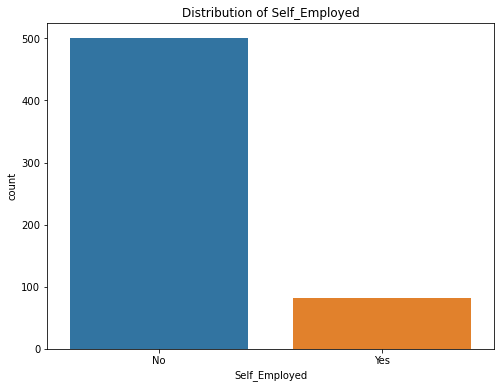

In [24]:
# plotting graph to show counts of Self_Employed columns
plt.figure(figsize=(8,6))
sns.countplot(x='Self_Employed',data=df)
plt.xlabel=('Self_Employed')
plt.ylabel=('values')
plt.title('Distribution of Self_Employed')
plt.show()

in the dataset the number of self employed applicants is less, so we'll replace the missing values with 'No'

In [25]:
# Replacing missing value
df['Self_Employed'].fillna('No',inplace=True)

In [26]:
# For loan replacing value in mean
df['LoanAmount'].mean()

146.41216216216216

In [27]:
# Replacing the missing values with the mean value
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [28]:
# we replacing LoanAmount_Term column with the median value
df['Loan_Amount_Term'].median()

360.0

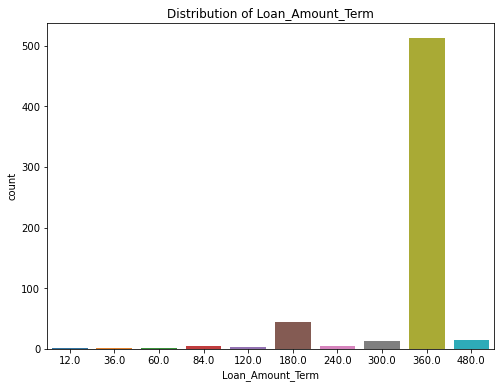

In [29]:
# plotting graph to show counts of Loan_Amount_Term columns
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Amount_Term',data=df)
plt.xlabel=('Loan_Amount_Term')
plt.ylabel=('values')
plt.title('Distribution of Loan_Amount_Term')
plt.show()

In [30]:
#replacing missing value with median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [31]:
# checking Credit_History value count
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

As checked, most of the applicant has the Credit_History as 1.0. So, we'll replace the missing values with 1.0

In [32]:
# Replacing the missing value
df['Credit_History'].fillna('1.0',inplace=True)

In [33]:
# Now checking again missing value in our dataset
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now there is no any missing value in our dataset

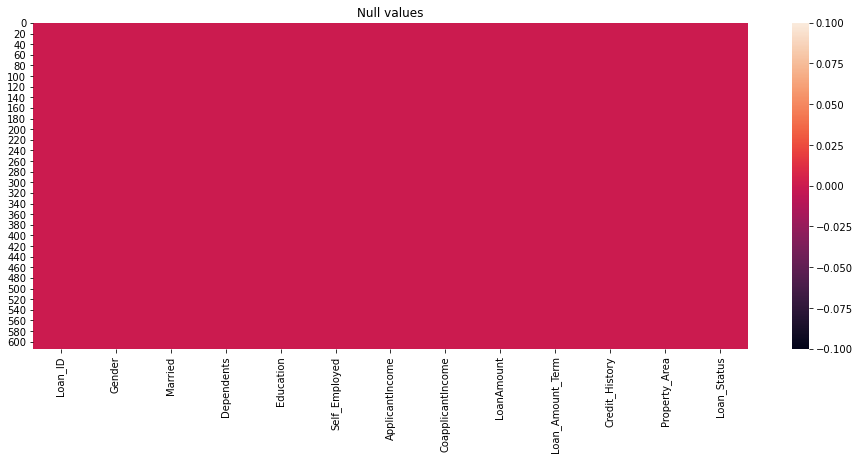

In [34]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Now there is no any missing value in our dataset

In [36]:
# Statistical summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423
std,6109.041673,2926.248369,84.037468,64.428629
min,150.000000,0.000000,9.000000,12.000000
25%,2877.500000,0.000000,100.250000,360.000000
50%,3812.500000,1188.500000,129.000000,360.000000
75%,5795.000000,2297.250000,164.750000,360.000000
max,81000.000000,41667.000000,700.000000,480.000000


<AxesSubplot:>

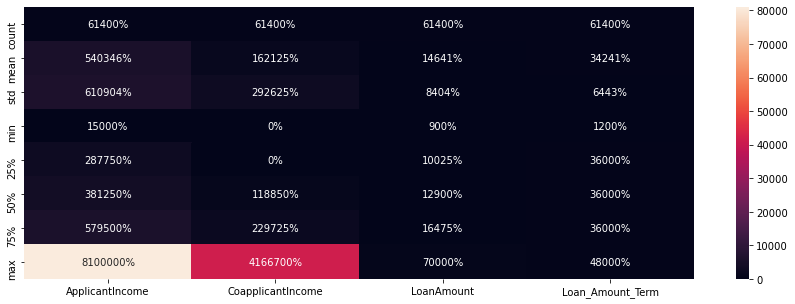

In [37]:
# Plotting heatmap for Statistical summary
plt.figure(figsize=(15,5))
sns.heatmap(df.describe(),annot=True,fmt='.0%')

#### Label encoding the categorical variables:

In [39]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

variables= ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for i in variables:
    df[i] = LE.fit_transform(df[i])

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1


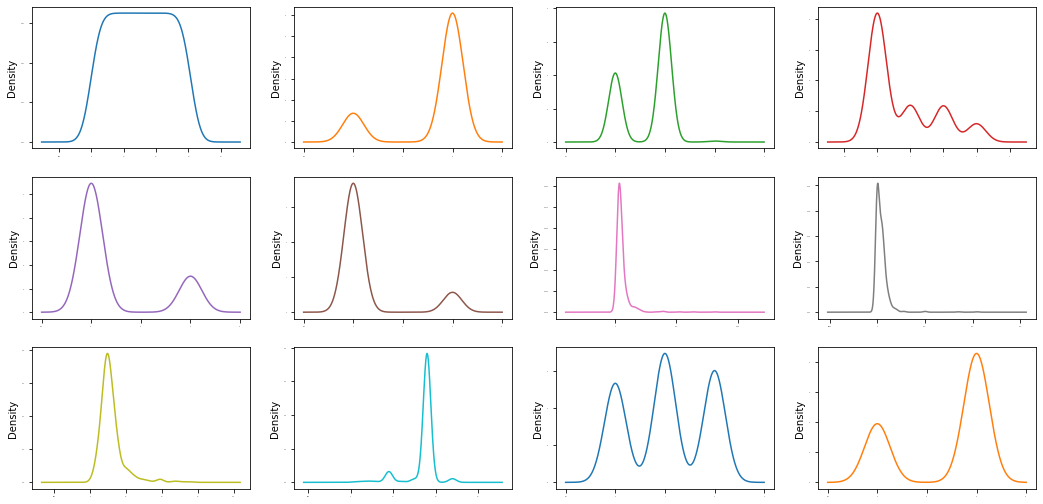

In [41]:
# checking distribution among all columns
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=[18,12])
plt.show()

In the dataset skewness of many columns

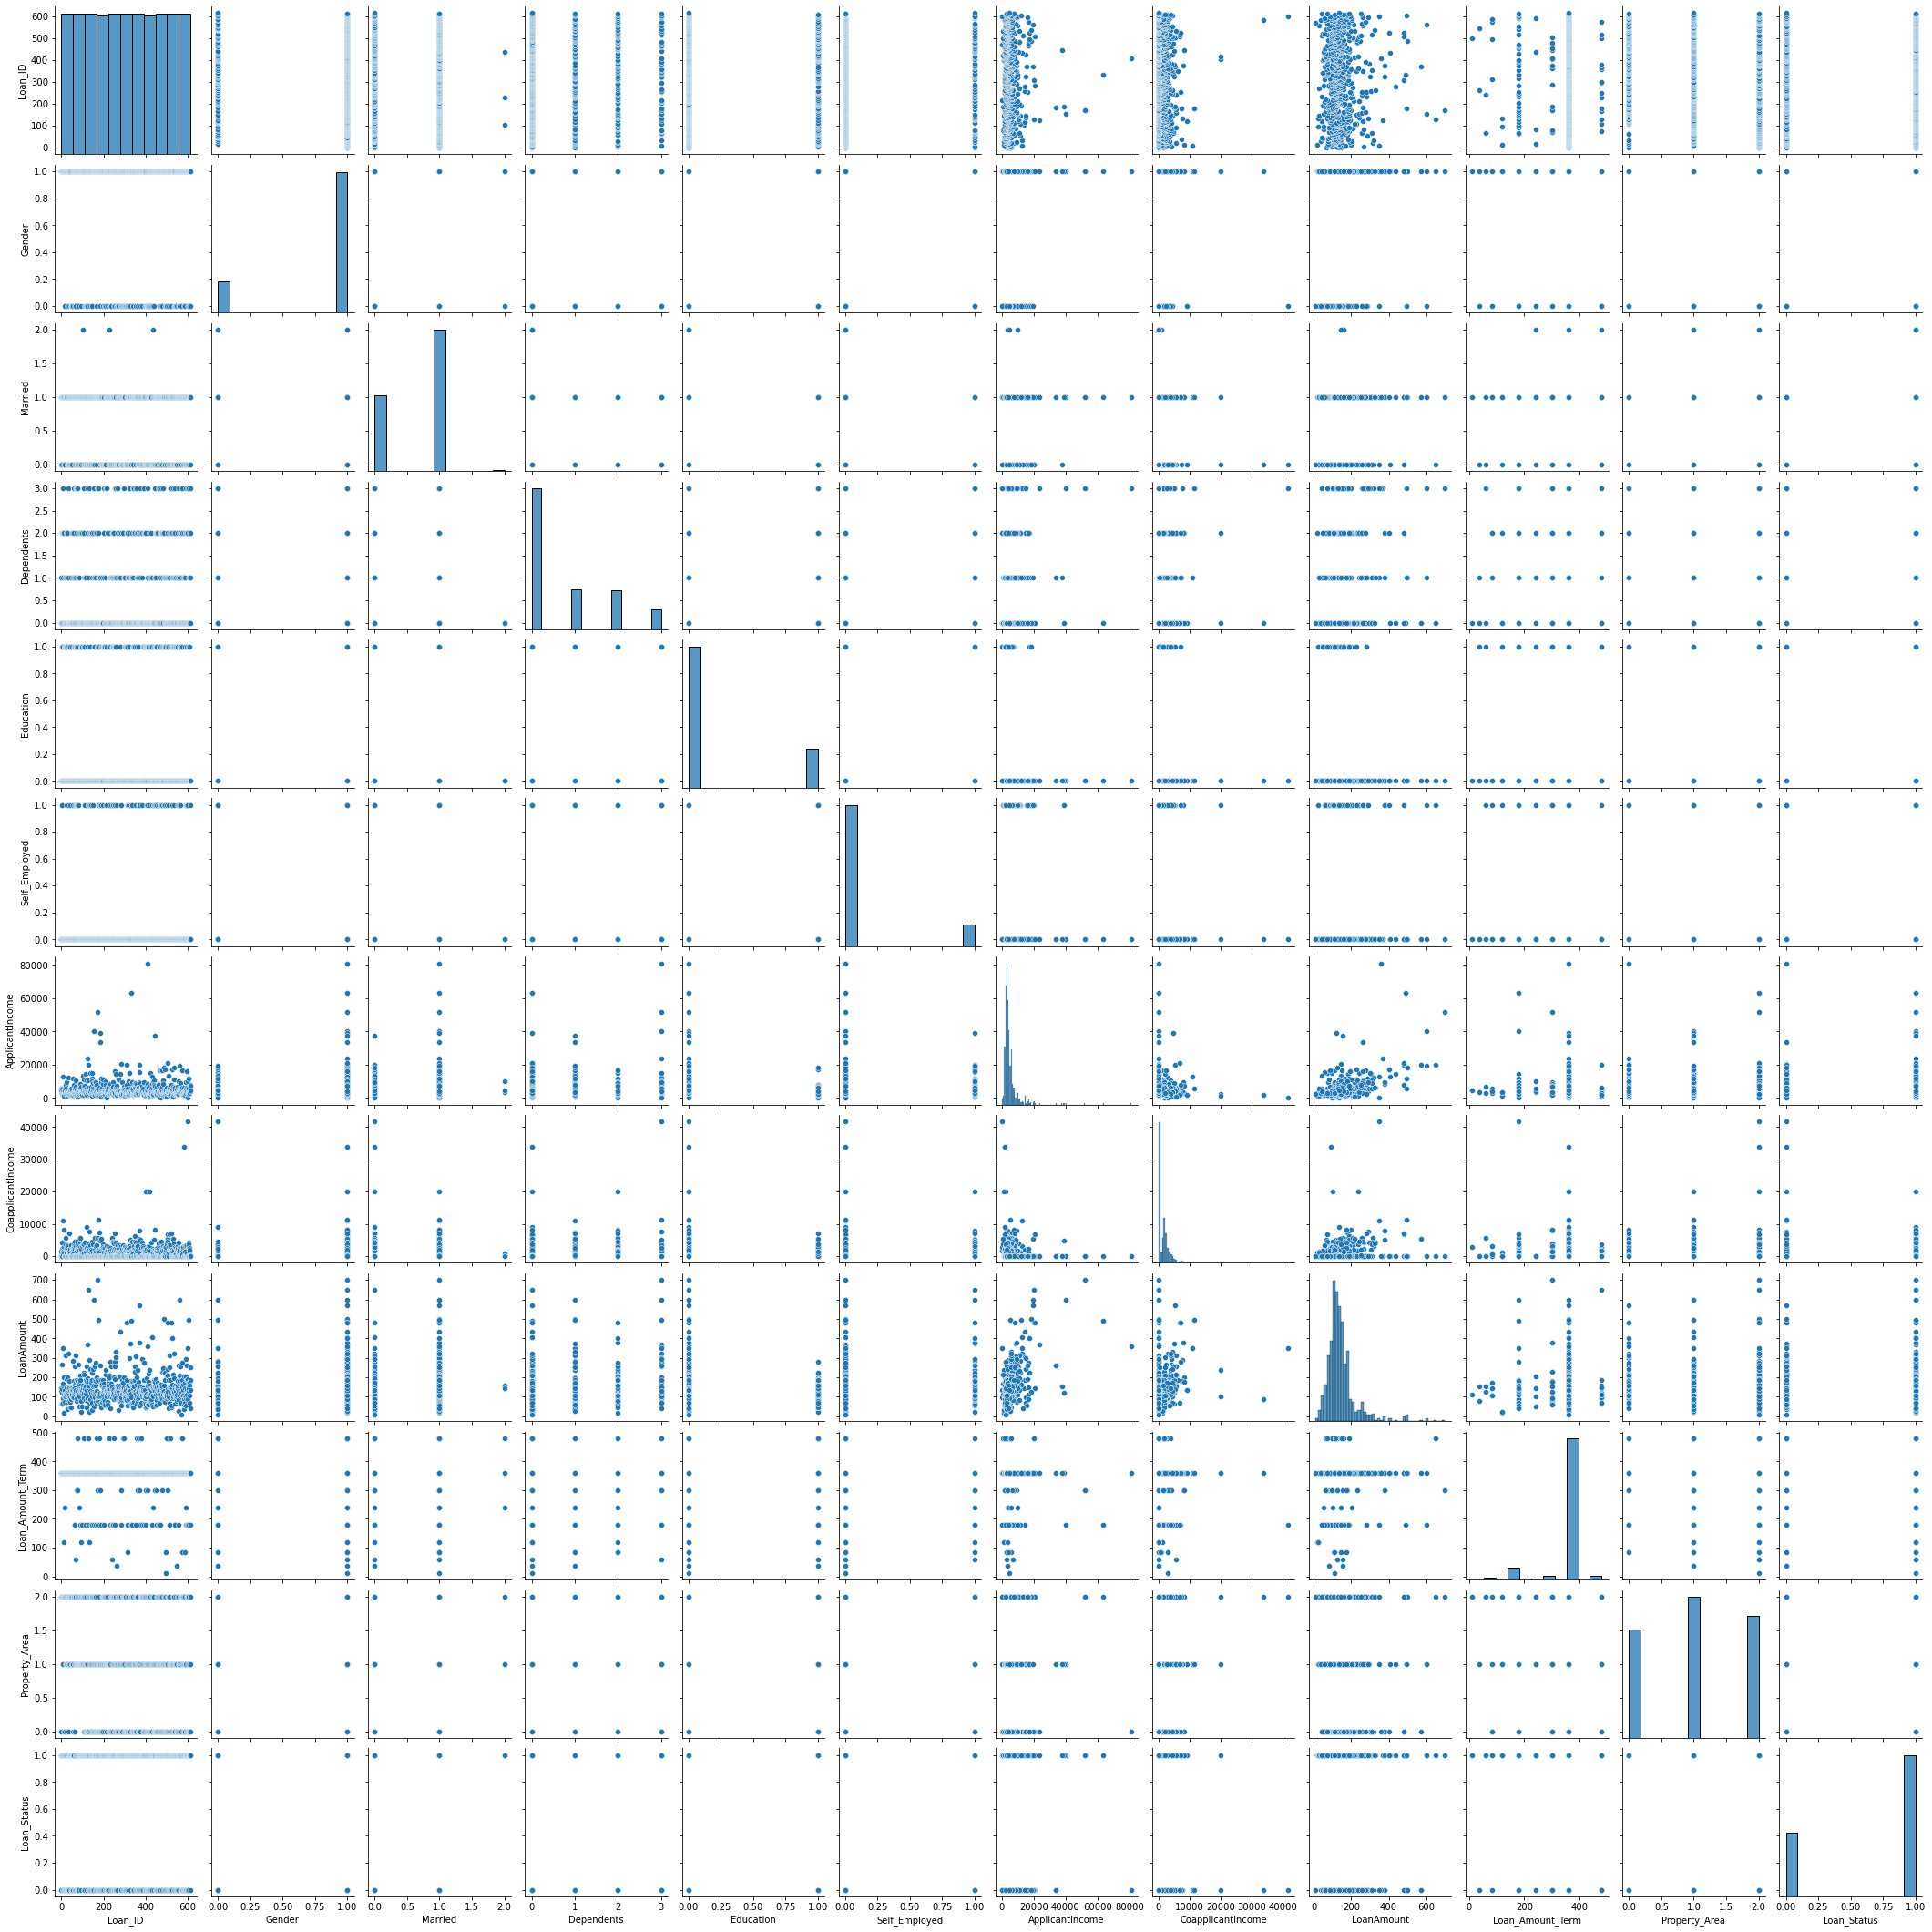

In [42]:
# Using pairplot

sns.pairplot(df)
plt.show()

In [43]:
# Checking correlation of the variables
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.018621,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.033028,-0.155416,0.011773
Gender,-0.028029,1.000000,0.354165,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.074030,-0.025752,0.017987
Married,-0.018621,0.354165,1.000000,0.320851,0.006759,0.000451,0.052119,0.069877,0.145541,-0.096368,0.007973,0.096657
Dependents,0.051559,0.172914,0.320851,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.103864,-0.000244,0.010118
Education,0.039442,0.045364,0.006759,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.073928,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.000451,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033739,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.052119,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.046531,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.069877,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059383,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.145541,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.036475,-0.044776,-0.036416
Loan_Amount_Term,-0.033028,-0.074030,-0.096368,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036475,1.000000,-0.076120,-0.022549


<AxesSubplot:>

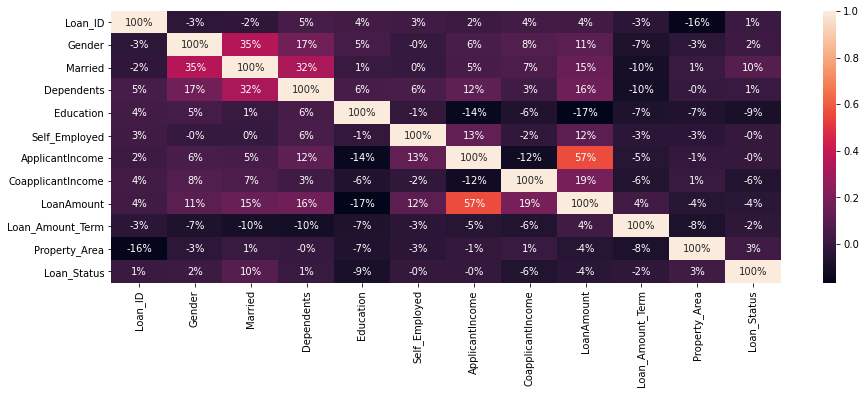

In [44]:
# Plotting heatmap for Statistical summary
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

The relation between Applicantincome vs loanamount is high.and there is no any relationship between loan status vs Applicantincome and also no any relationship between loan status vs Self employed

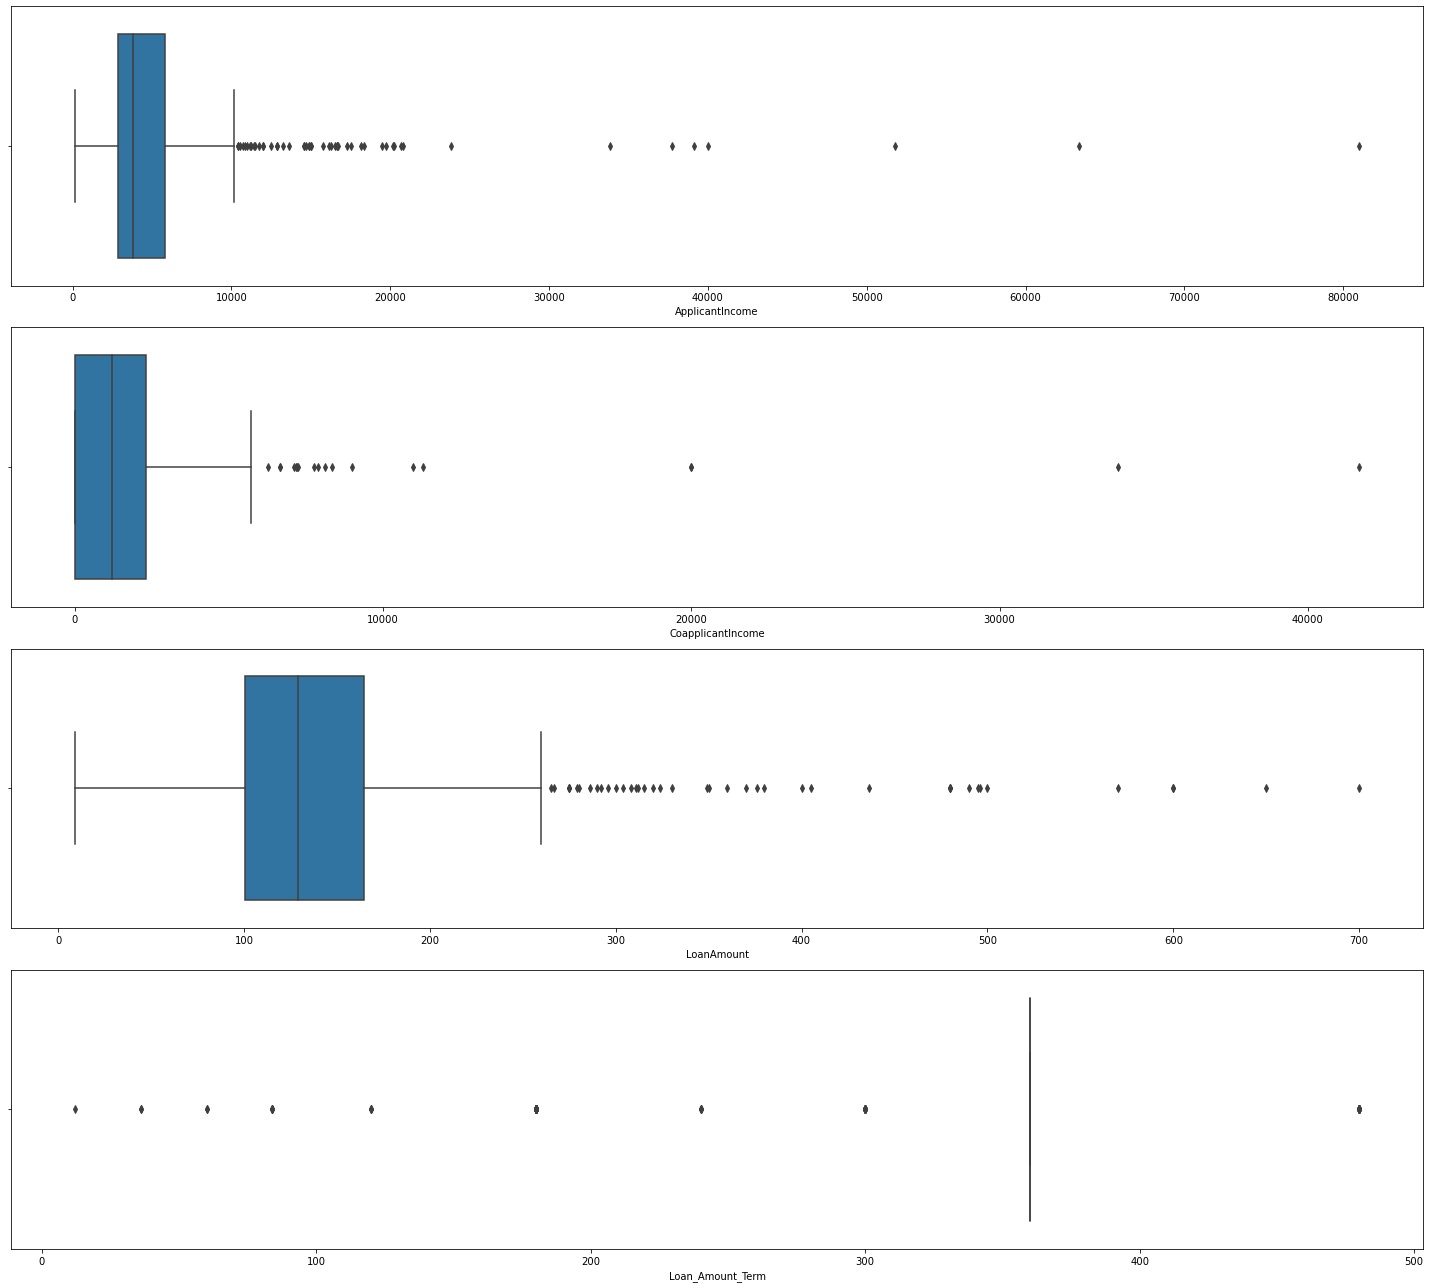

In [45]:
# Checking outliers
# plotting boxplot to check the outliers in the dataset:
fig, axs = plt.subplots(4, figsize = (20,18))
plt1 = sns.boxplot(df['ApplicantIncome'], ax = axs[0], orient='v')
plt2 = sns.boxplot(df['CoapplicantIncome'], ax = axs[1], orient='v')
plt3 = sns.boxplot(df['LoanAmount'], ax=axs[2], orient='v')
plt4 = sns.boxplot(df['Loan_Amount_Term'], ax = axs[3], orient='v')


plt.tight_layout()

Outlier are avaiable on our dataset

#### Data cleaning using Power transform technique

In [46]:
# Splitting the dataset into independent and dependent variables:

x = df.drop(["Loan_ID", "Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"], axis=1) #dropping the categorical and target columns.
y = df["Loan_Status"]

In [47]:
# Removing the skewness using the power transform

from sklearn.preprocessing import power_transform
x = power_transform(x)
x

array([[ 0.5443313 , -1.10283684,  0.23538679,  0.17554004,  0.41173269],
       [ 0.17097382,  0.75057774, -0.0376586 ,  0.17554004,  0.41173269],
       [-0.49995512, -1.10283684, -1.34630531,  0.17554004,  0.41173269],
       ...,
       [ 1.02348683,  0.20860307,  1.37240931,  0.17554004,  0.41173269],
       [ 0.93175029, -1.10283684,  0.73892362,  0.17554004,  0.41173269],
       [ 0.17097382, -1.10283684,  0.03993645,  0.17554004, -2.42876026]])

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)
x

array([[ 0.5443313 , -1.10283684,  0.23538679,  0.17554004,  0.41173269],
       [ 0.17097382,  0.75057774, -0.0376586 ,  0.17554004,  0.41173269],
       [-0.49995512, -1.10283684, -1.34630531,  0.17554004,  0.41173269],
       ...,
       [ 1.02348683,  0.20860307,  1.37240931,  0.17554004,  0.41173269],
       [ 0.93175029, -1.10283684,  0.73892362,  0.17554004,  0.41173269],
       [ 0.17097382, -1.10283684,  0.03993645,  0.17554004, -2.42876026]])

#### Handling data imbalance by oversampling:

In [49]:
from imblearn.over_sampling import SMOTE
Sm = SMOTE()
x_over, y_over = Sm.fit_resample(x,y)

In [50]:
#Checking the value count of the target column after oversampling
y_over.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Now the target column is balanced

#### finding best Randomstate:

In [51]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS = i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)
    

Best accuracy is 0.8648648648648649 on Random_state 8


We have found best random_state value as 8 .we will create our train_test split this random_state(8)

#### Creating train_test split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size=.30,random_state = 8)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7047244094488189
[[ 57  72]
 [  3 122]]
              precision    recall  f1-score   support

           0       0.95      0.44      0.60       129
           1       0.63      0.98      0.76       125

    accuracy                           0.70       254
   macro avg       0.79      0.71      0.68       254
weighted avg       0.79      0.70      0.68       254



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7440944881889764
[[93 36]
 [29 96]]
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       129
           1       0.73      0.77      0.75       125

    accuracy                           0.74       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.75      0.74      0.74       254



In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7519685039370079
[[94 35]
 [28 97]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       129
           1       0.73      0.78      0.75       125

    accuracy                           0.75       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.75      0.75      0.75       254



In [56]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.7047244094488189
[[ 61  68]
 [  7 118]]
              precision    recall  f1-score   support

           0       0.90      0.47      0.62       129
           1       0.63      0.94      0.76       125

    accuracy                           0.70       254
   macro avg       0.77      0.71      0.69       254
weighted avg       0.77      0.70      0.69       254



We are getting highest accuracy with SVC(75%)but it can due to overfitting also so we will check cross validation scores.

#### Cross validation to check the score

In [57]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR,x,y,cv=5)

print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.809462881514061


In [58]:
scr = cross_val_score(dt,x,y,cv=5)

print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.7117552978808476


In [59]:
scr = cross_val_score(dt,x,y,cv=5)

print("Cross validation score of RandomForest model :",scr.mean())

Cross validation score of RandomForest model : 0.7117286418765827


In [60]:
scr = cross_val_score(svc,x,y,cv=5)

print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.8078368652538984


RandomForestClassifieris our best model.

#### Hyper parameter tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
# RandomForestClassifier

parameters = {'n_estimators':[200,700],
             'max_features':['auto','sqrt','log2'],
             'max_depth': [4,5,6,7,8],
             'criterion': ['gini','entropy']}

In [75]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]})

In [80]:
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [81]:
mod = RandomForestClassifier(criterion='gini',max_features='sqrt',max_depth=8,n_estimators=700)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)

print(accuracy_score(y_test,pred)*100)

71.65354330708661


In [ ]:
Lets plot ROC AUC Curve to choose the best model

In [92]:
# Plot ROC/AUC for multiple models without hyperparams tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [93]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [94]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


### Lets find ROC AUC score

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.7011782945736433

# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

In [98]:
# KneighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.7834728682170544

In [99]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

0.9648682170542635

In [100]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.6369612403100775

#### Lets check ROC AUC curve for the fitted model

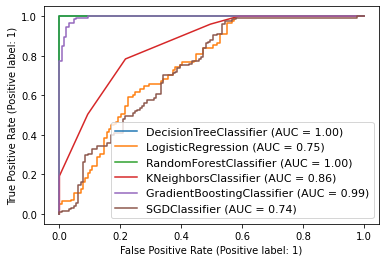

In [101]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

#### Saving model

In [104]:
import joblib
joblib.dump(mod,'Loan Application Status.pk1')

['Loan Application Status.pk1']